In [158]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import contractions
import langid
import spacy
import emoji
from spacy.language import Language
from spacy_language_detection import LanguageDetector
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
splits = {'train': 'simplified/train-00000-of-00001.parquet', 'validation': 'simplified/validation-00000-of-00001.parquet', 'test': 'simplified/test-00000-of-00001.parquet'}
train_df = pd.read_parquet("hf://datasets/google-research-datasets/go_emotions/" + splits["train"])

/Users/sudeepmungara/Documents/Personal_Projects/NLP/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_df.shape

(43410, 3)

In [4]:
train_df.columns

Index(['text', 'labels', 'id'], dtype='object')

In [5]:
train_df.head(10)

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26],edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,[15],ee3b6wu
7,We need more boards and to create a bit more s...,"[8, 20]",ef4qmod
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn
9,It might be linked to the trust factor of your...,[27],eczgv1o


In [6]:
emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

In [7]:
train_df.isnull().sum()

text      0
labels    0
id        0
dtype: int64

In [8]:
id2label = {i:emotions[i] for i in range(len(emotions))}

In [9]:
id2label

{0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'caring',
 6: 'confusion',
 7: 'curiosity',
 8: 'desire',
 9: 'disappointment',
 10: 'disapproval',
 11: 'disgust',
 12: 'embarrassment',
 13: 'excitement',
 14: 'fear',
 15: 'gratitude',
 16: 'grief',
 17: 'joy',
 18: 'love',
 19: 'nervousness',
 20: 'optimism',
 21: 'pride',
 22: 'realization',
 23: 'relief',
 24: 'remorse',
 25: 'sadness',
 26: 'surprise',
 27: 'neutral'}

In [10]:
type(train_df.labels.iloc[7])

numpy.ndarray

In [11]:
train_df['class_len'] = train_df.labels.apply(lambda x: len(x))

In [12]:
train_df.head(10)

,text,labels,id,class_len
0,My favourite food is anything I didn't have to...,[27],eebbqej,1
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1
3,To make her feel threatened,[14],ed7ypvh,1
4,Dirty Southern Wankers,[3],ed0bdzj,1
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26],edvnz26,1
6,Yes I heard abt the f bombs! That has to be wh...,[15],ee3b6wu,1
7,We need more boards and to create a bit more s...,"[8, 20]",ef4qmod,2
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn,1
9,It might be linked to the trust factor of your...,[27],eczgv1o,1


In [19]:
for i in id2label:
    train_df[id2label[i]] = train_df.labels.apply(lambda x: 1 if i in x else 0)

In [20]:
train_df

,text,labels,id,class_len,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,[14],ed7ypvh,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,[3],ed0bdzj,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43405,Added you mate well I’ve just got the bow and ...,[18],edsb738,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
43406,Always thought that was funny but is it a refe...,[6],ee7fdou,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43407,What are you talking about? Anything bad that ...,[3],efgbhks,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
43408,"More like a baptism, with sexy results!",[13],ed1naf8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_df['class_len'].describe()

count    43410.000000
mean         1.177217
std          0.417699
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: class_len, dtype: float64

In [47]:
train_df['class_len'].value_counts()

class_len
1    36308
2     6541
3      532
4       28
5        1
Name: count, dtype: int64

In [26]:
label_distribution={}
for emo in emotions:
    label_distribution[emo] = train_df[emo].value_counts()[1]

<Axes: >

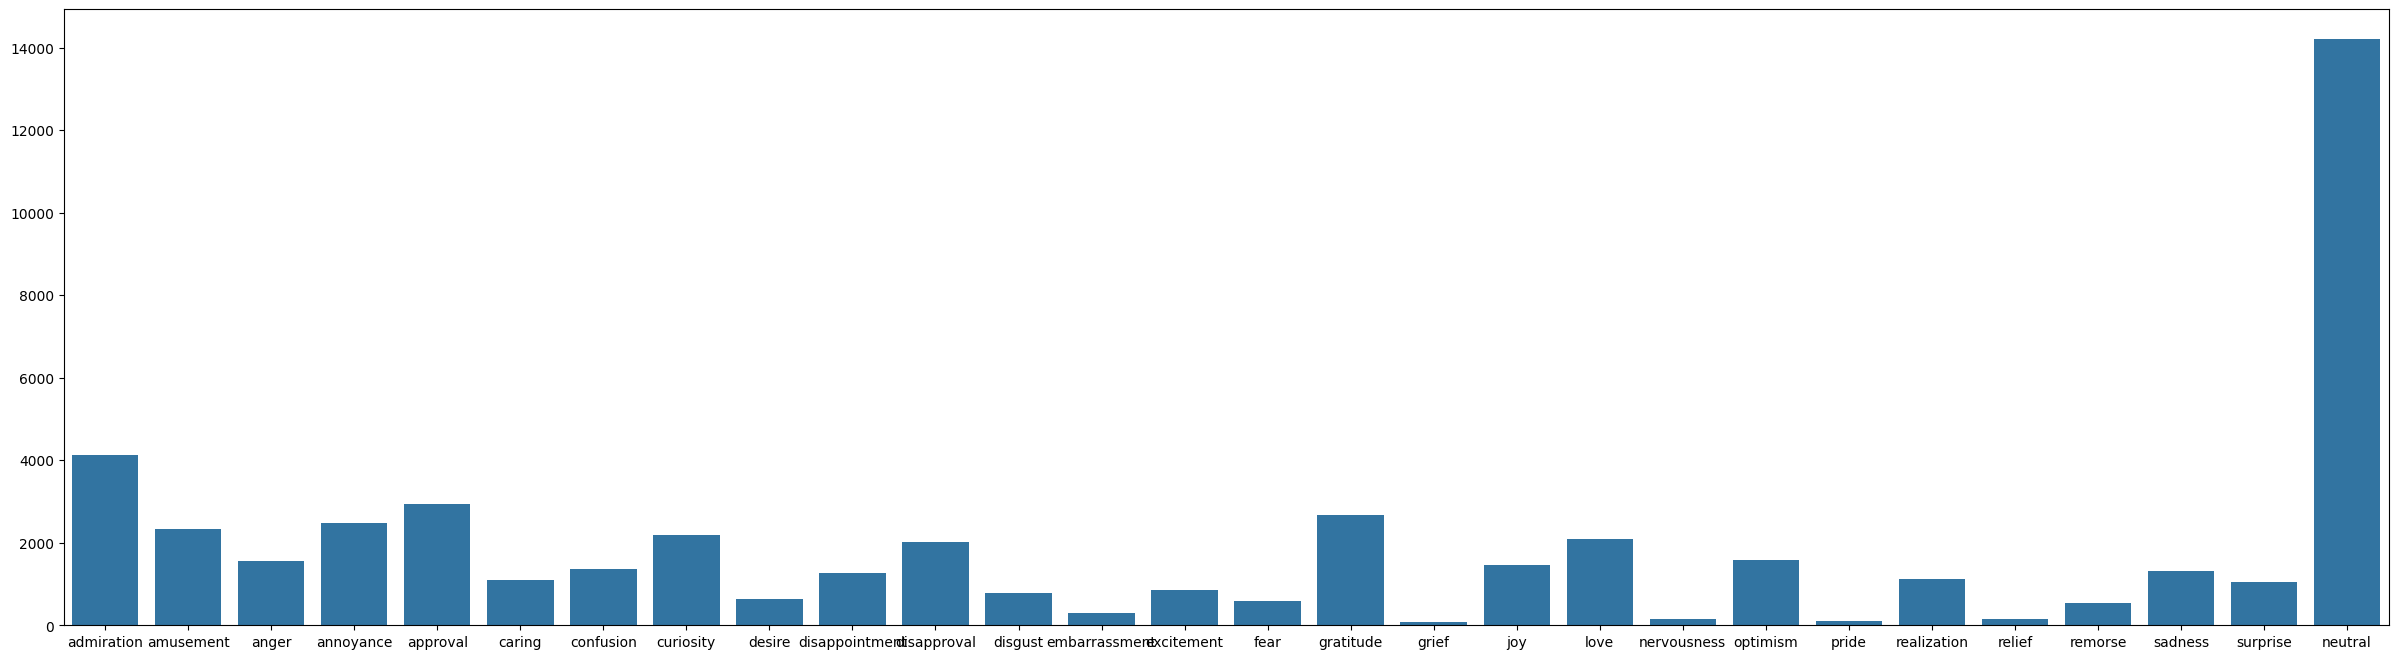

In [37]:
plt.figure(figsize=(30, 8))
sns.barplot(x=list(label_distribution.keys()),y=list(label_distribution.values()))

In [51]:
class_len_1_df = train_df[train_df['class_len']==1]

In [57]:
class_len_1_df

,text,labels,id,class_len,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,[14],ed7ypvh,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,[3],ed0bdzj,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43405,Added you mate well I’ve just got the bow and ...,[18],edsb738,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
43406,Always thought that was funny but is it a refe...,[6],ee7fdou,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43407,What are you talking about? Anything bad that ...,[3],efgbhks,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
43408,"More like a baptism, with sexy results!",[13],ed1naf8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
class_len_1_label_distribution={}
for emo in emotions:
    class_len_1_label_distribution[emo] = class_len_1_df[emo].value_counts()[1]

<Axes: >

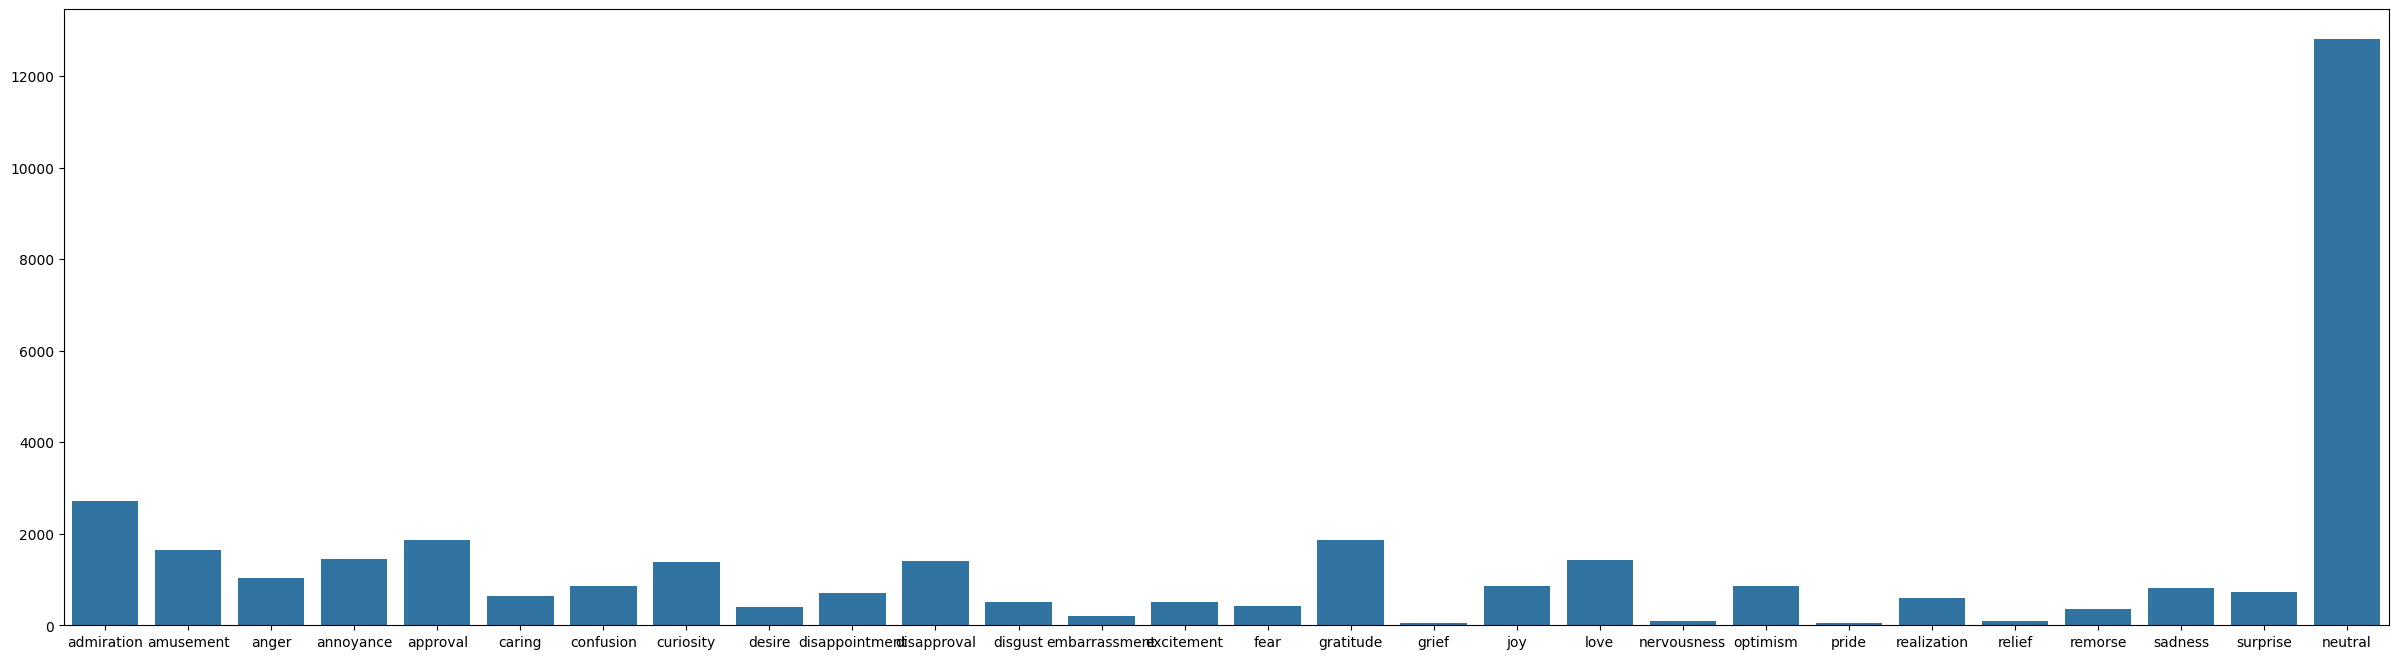

In [63]:
plt.figure(figsize=(30, 8))
sns.barplot(x=list(class_len_1_label_distribution.keys()),y=list(class_len_1_label_distribution.values()))

In [64]:
class_len_2_df = train_df[train_df['class_len']==2]

In [65]:
class_len_2_label_distribution={}
for emo in emotions:
    class_len_2_label_distribution[emo] = class_len_2_df[emo].value_counts()[1]

<Axes: >

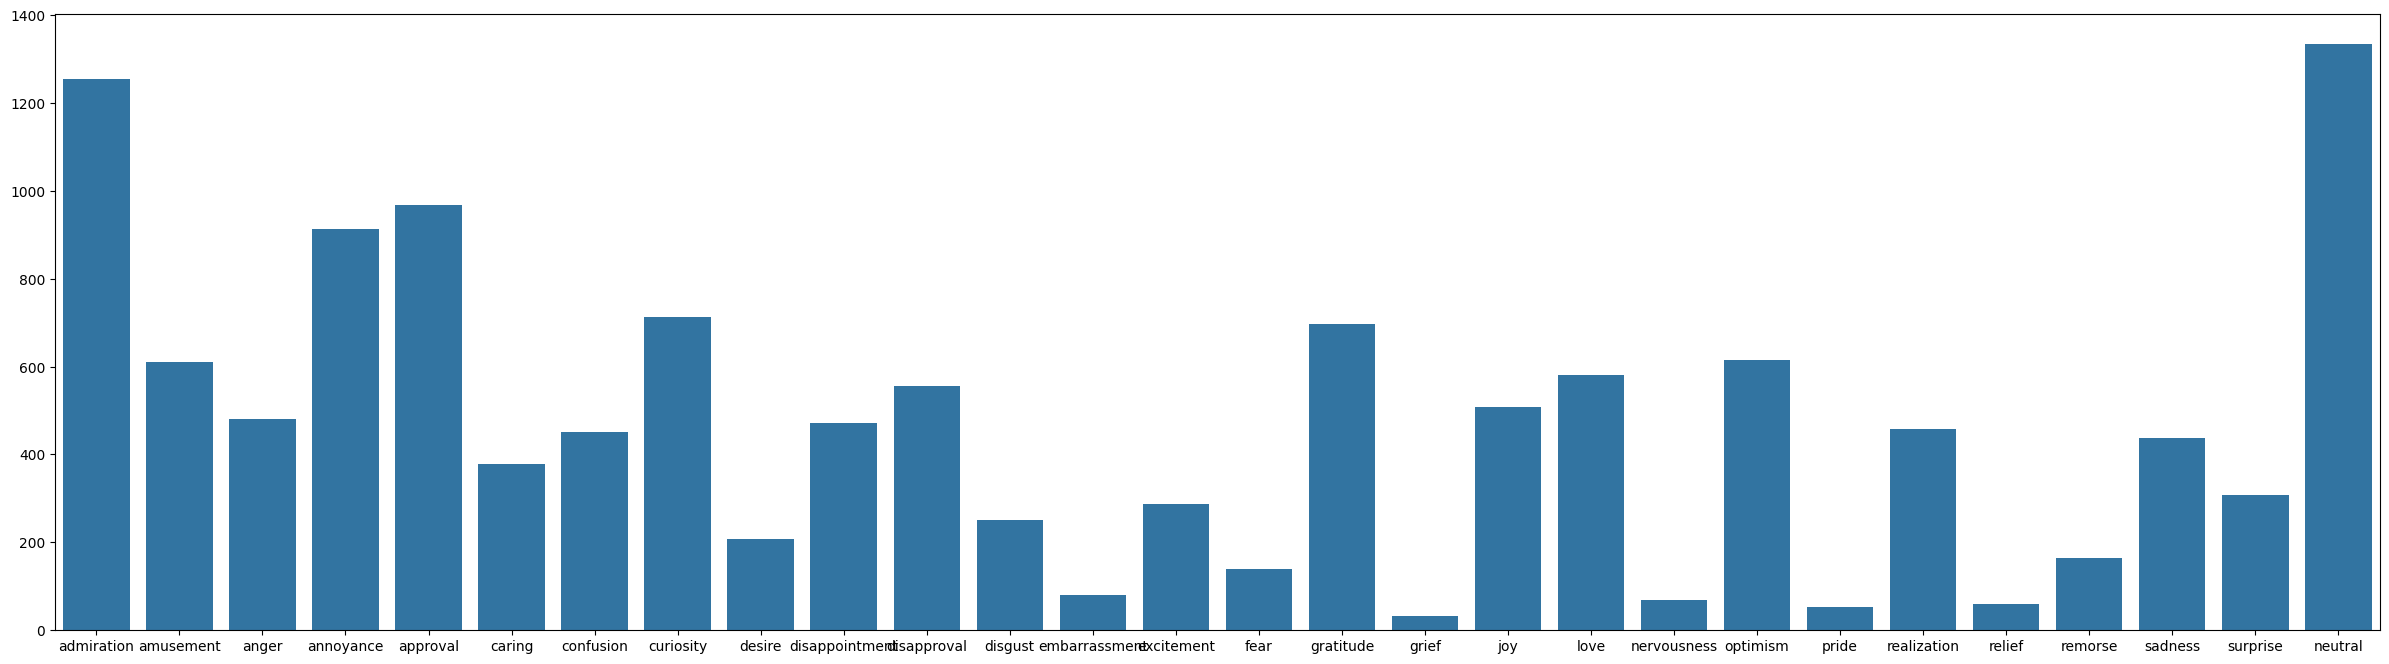

In [66]:
plt.figure(figsize=(30, 8))
sns.barplot(x=list(class_len_2_label_distribution.keys()),y=list(class_len_2_label_distribution.values()))

In [67]:
class_len_3_df = train_df[train_df['class_len']==3]

In [68]:
class_len_3_label_distribution={}
for emo in emotions:
    class_len_3_label_distribution[emo] = class_len_3_df[emo].value_counts()[1]

<Axes: >

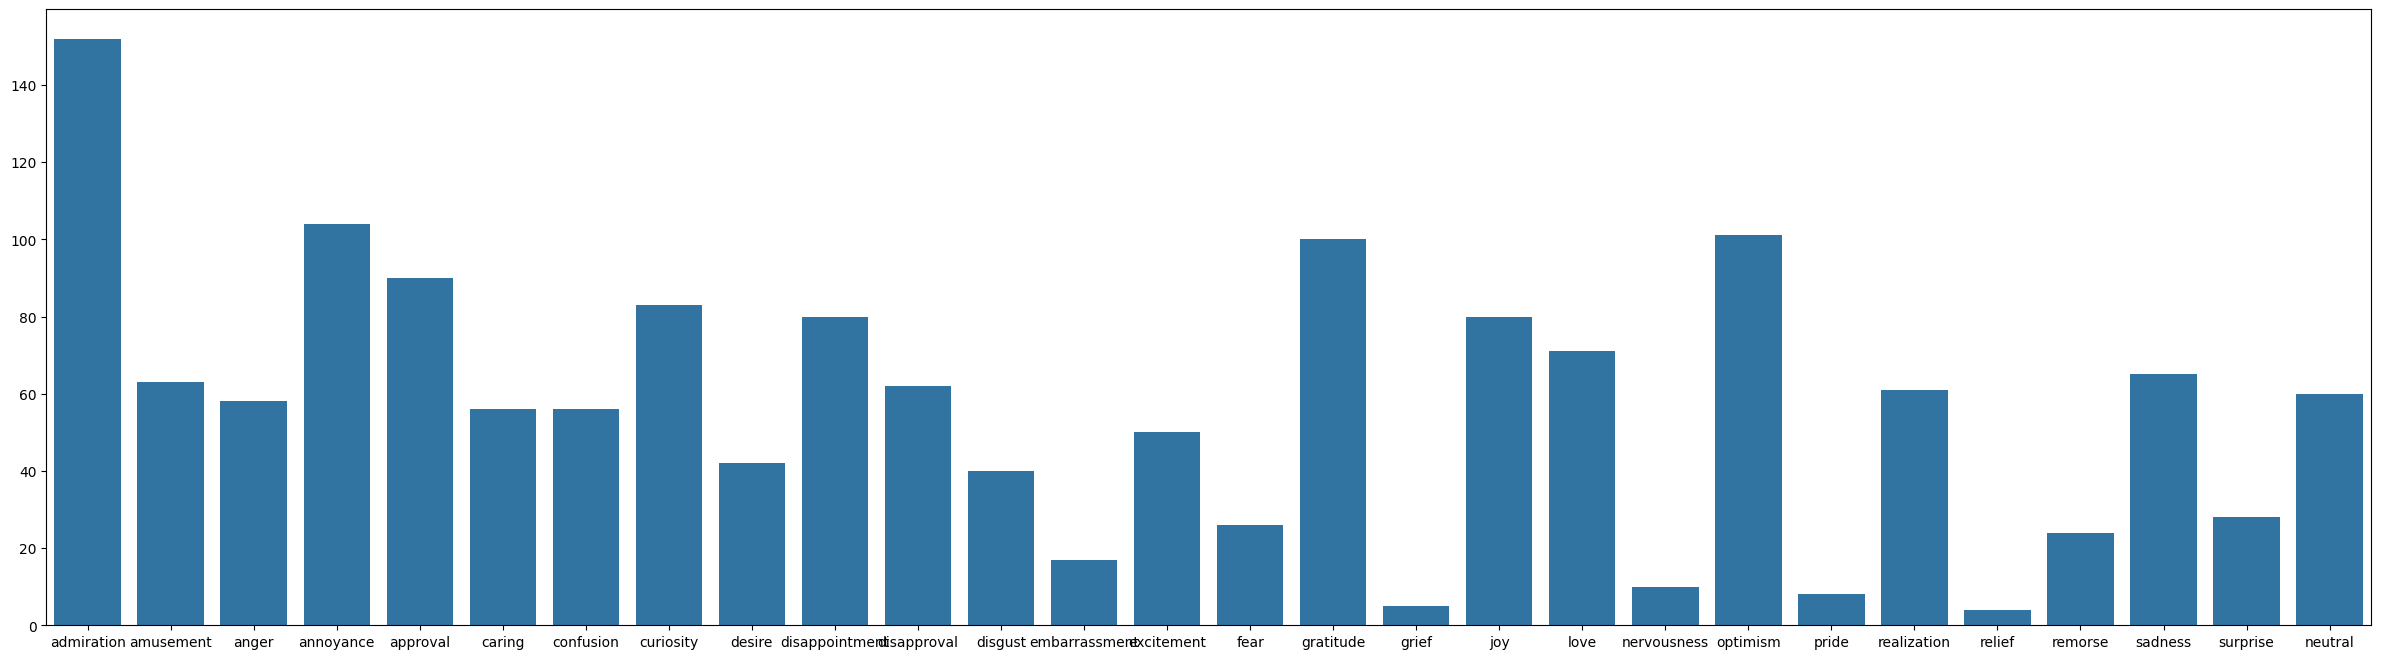

In [69]:
plt.figure(figsize=(30, 8))
sns.barplot(x=list(class_len_3_label_distribution.keys()),y=list(class_len_3_label_distribution.values()))

In [72]:
class_len_4_df = train_df[train_df['class_len']==4]

In [78]:
class_len_4_label_distribution={}
for emo in emotions:
    try:
        class_len_4_label_distribution[emo] = class_len_4_df[emo].value_counts()[1]
    except:
        class_len_4_label_distribution[emo] = 0

<Axes: >

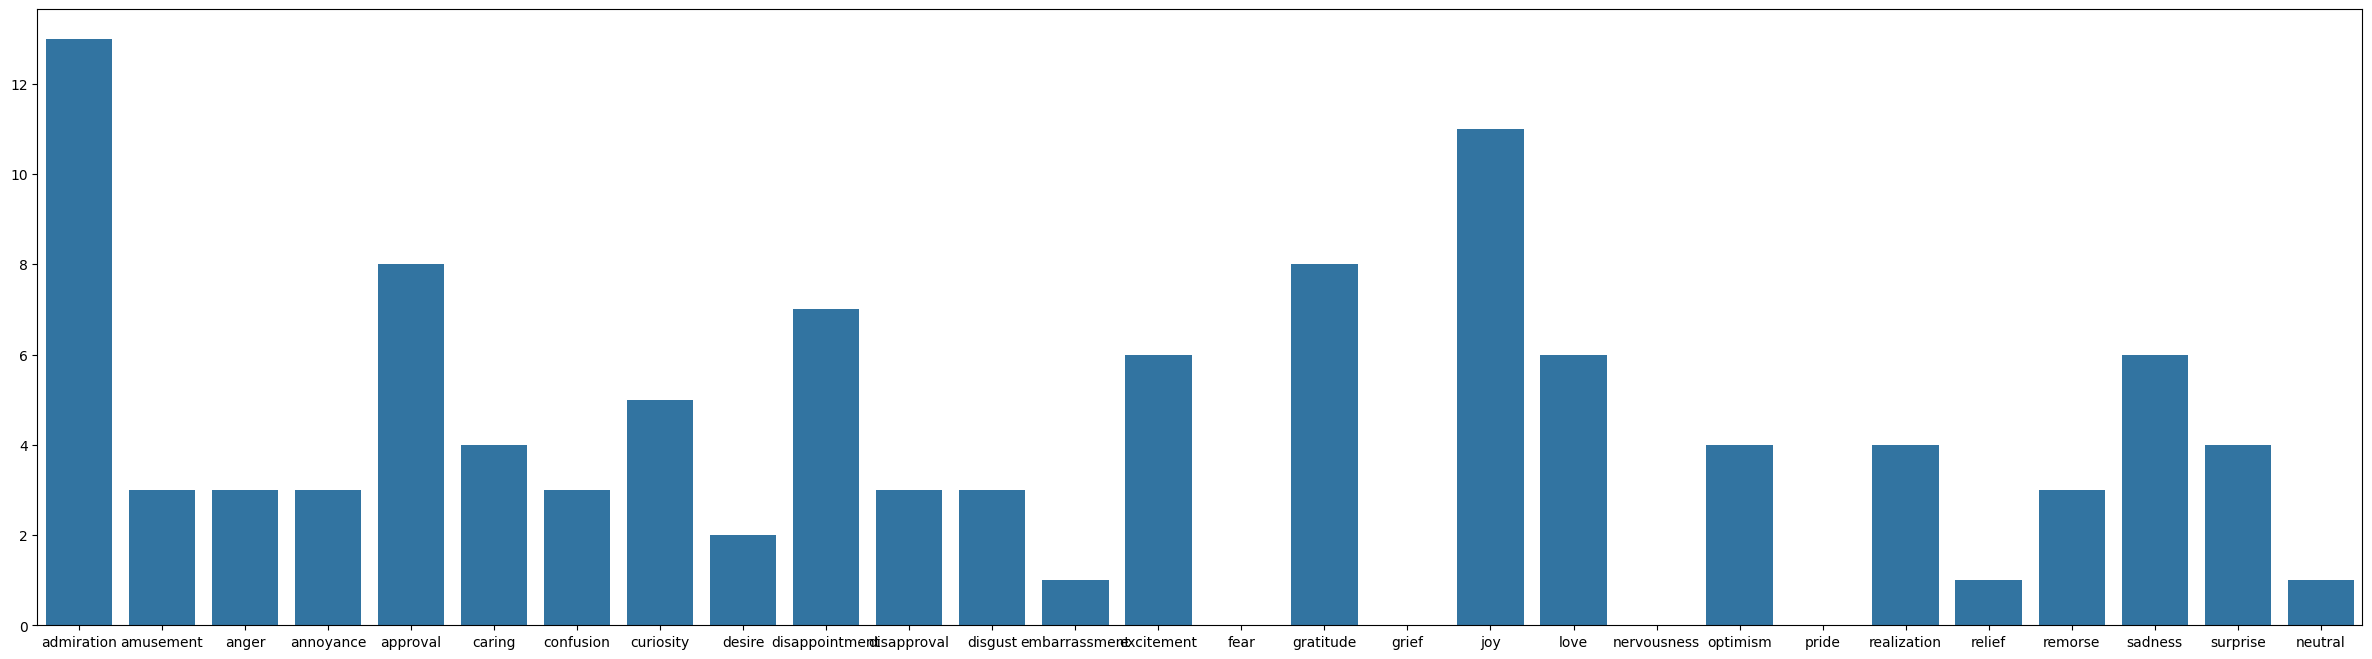

In [79]:
plt.figure(figsize=(30, 8))
sns.barplot(x=list(class_len_4_label_distribution.keys()),y=list(class_len_4_label_distribution.values()))

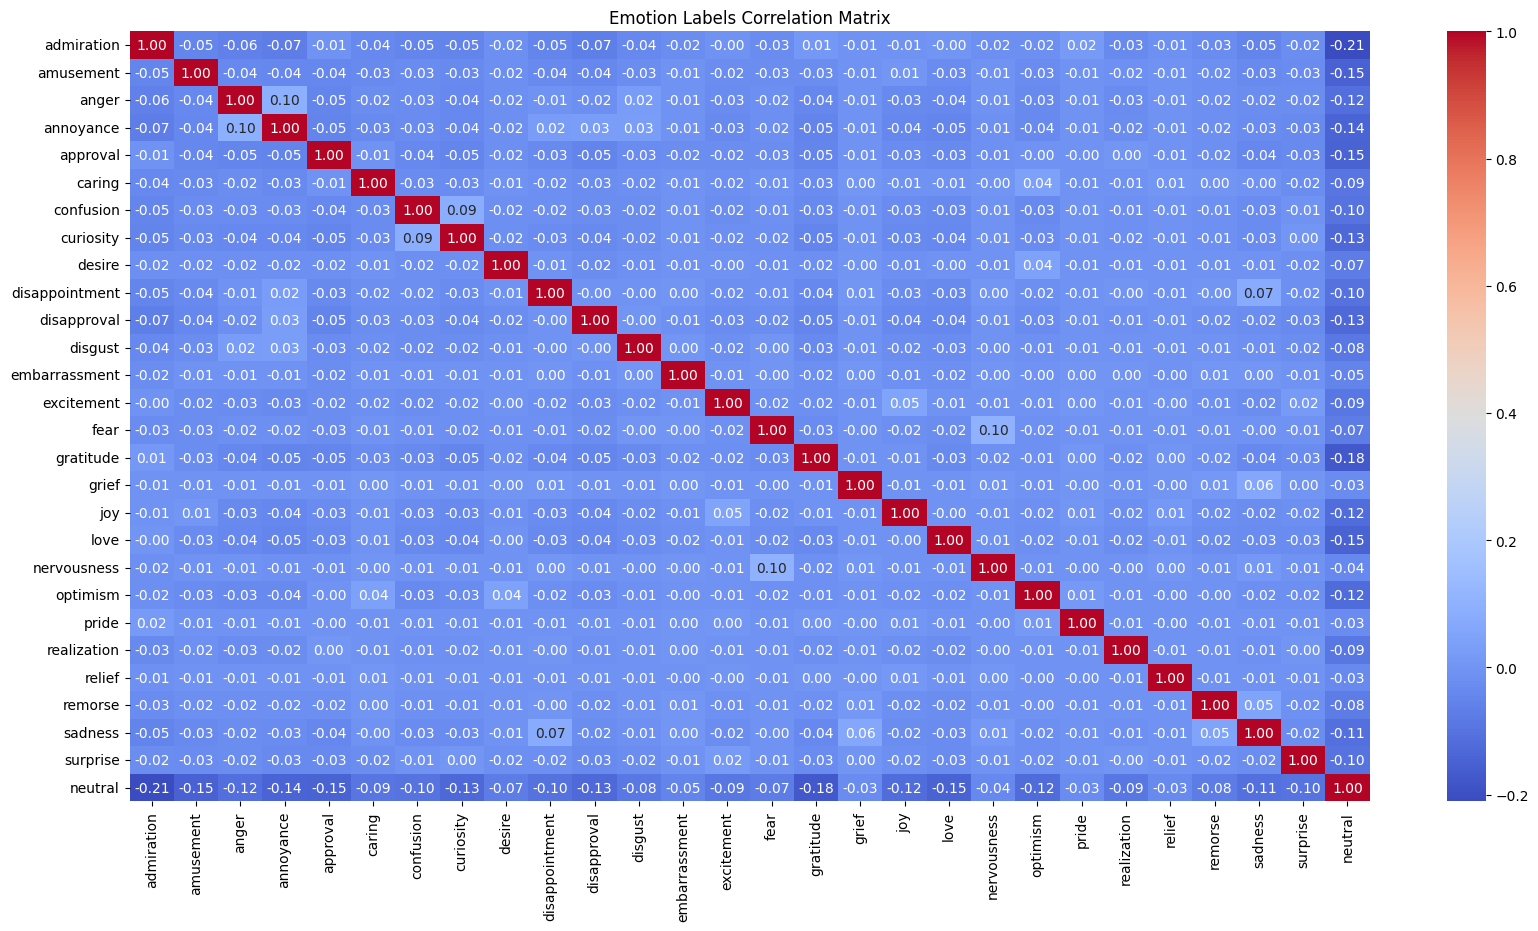

In [85]:
corr_matrix = train_df[emotions].corr(method='spearman')
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Emotion Labels Correlation Matrix')
plt.show()

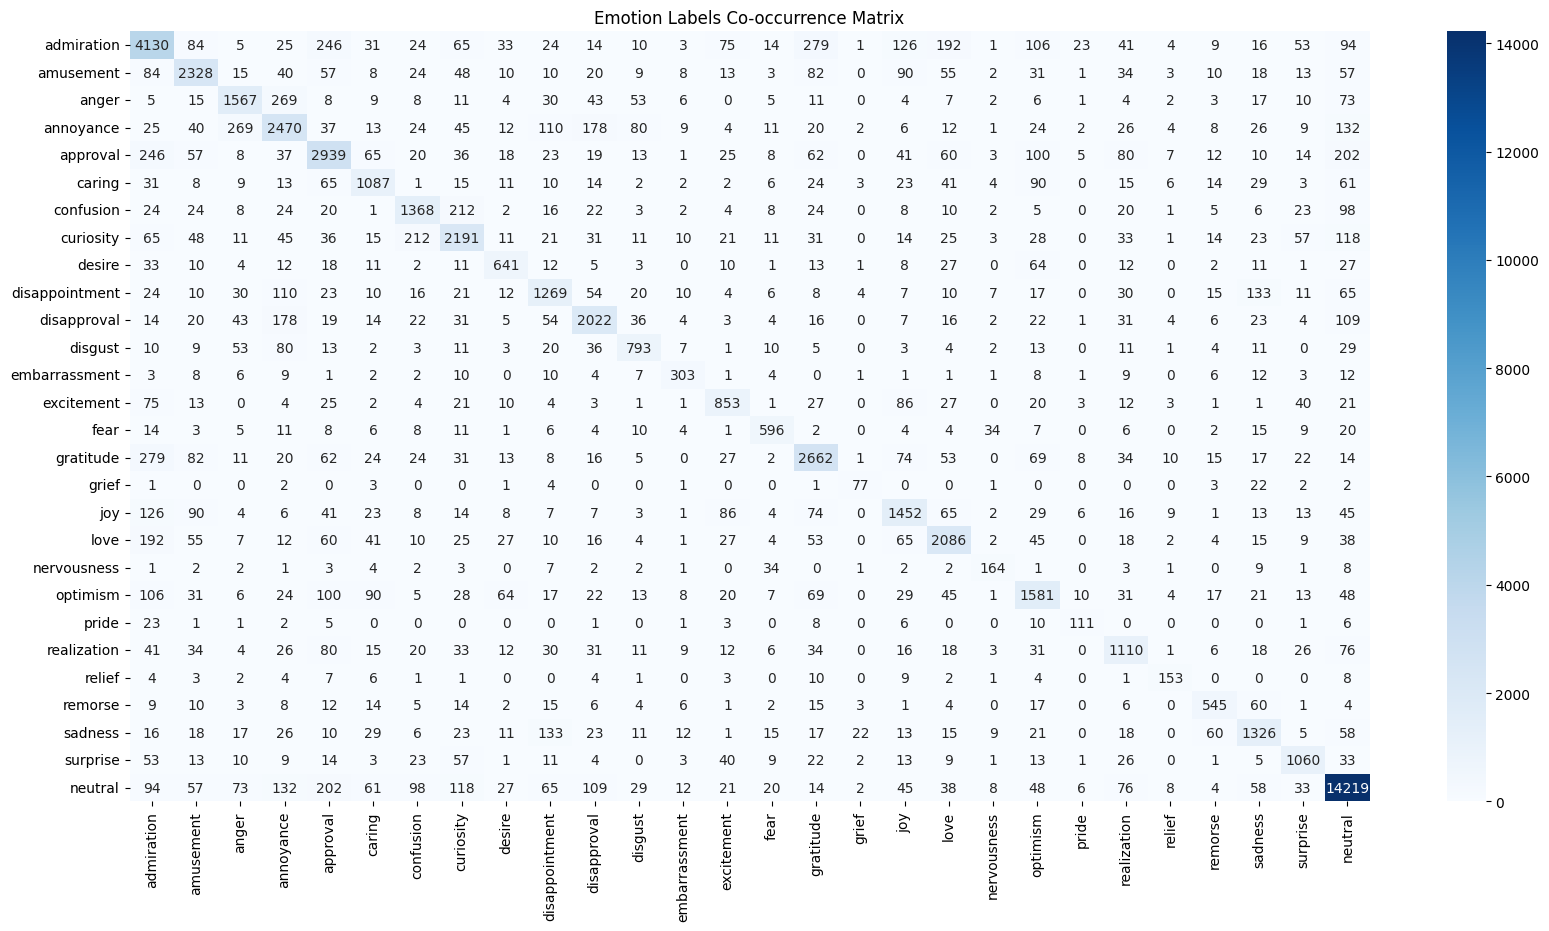

In [94]:
# Compute co-occurrence matrix
co_occurrence = np.dot(train_df[emotions].T, train_df[emotions])

# Convert to DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence, index=emotions, columns=emotions)

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(co_occurrence_df, annot=True, cmap='Blues', fmt='d')
plt.title('Emotion Labels Co-occurrence Matrix')
plt.show()


In [112]:
train_df['text'] = train_df['text'].apply(lambda x: contractions.fix(x))

In [116]:
train_df['text'][2]

'WHY THE FUCK IS BAYLESS ISOING'

In [131]:
# def detect_language_langid(text):
#     try:
#         lang, confidence = langid.classify(text)
#         return lang
#     except:
#         return "unknown"

def get_lang_detector(nlp, name):
    return LanguageDetector(seed=42)  # We use the seed 42


nlp_model = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp_model.add_pipe('language_detector', last=True)


In [136]:
def get_lang(text):
    doc = nlp_model(text)
    language = doc._.language
    return language.get('language')

In [137]:
train_df['lang']=train_df['text'].apply(lambda x: get_lang(x))

In [141]:
train_df['lang'].value_counts()

lang
en         40696
af           296
so           261
fr           219
cy           179
no           153
nl           152
de           150
tl           135
et           125
da           100
id            93
it            93
tr            88
vi            83
sv            80
pt            74
ro            71
sl            56
ca            55
pl            42
es            37
sw            34
sq            28
sk            27
fi            21
cs            20
hr            17
hu            11
lv             8
UNKNOWN        4
lt             2
Name: count, dtype: int64

<Axes: xlabel='lang', ylabel='Count'>

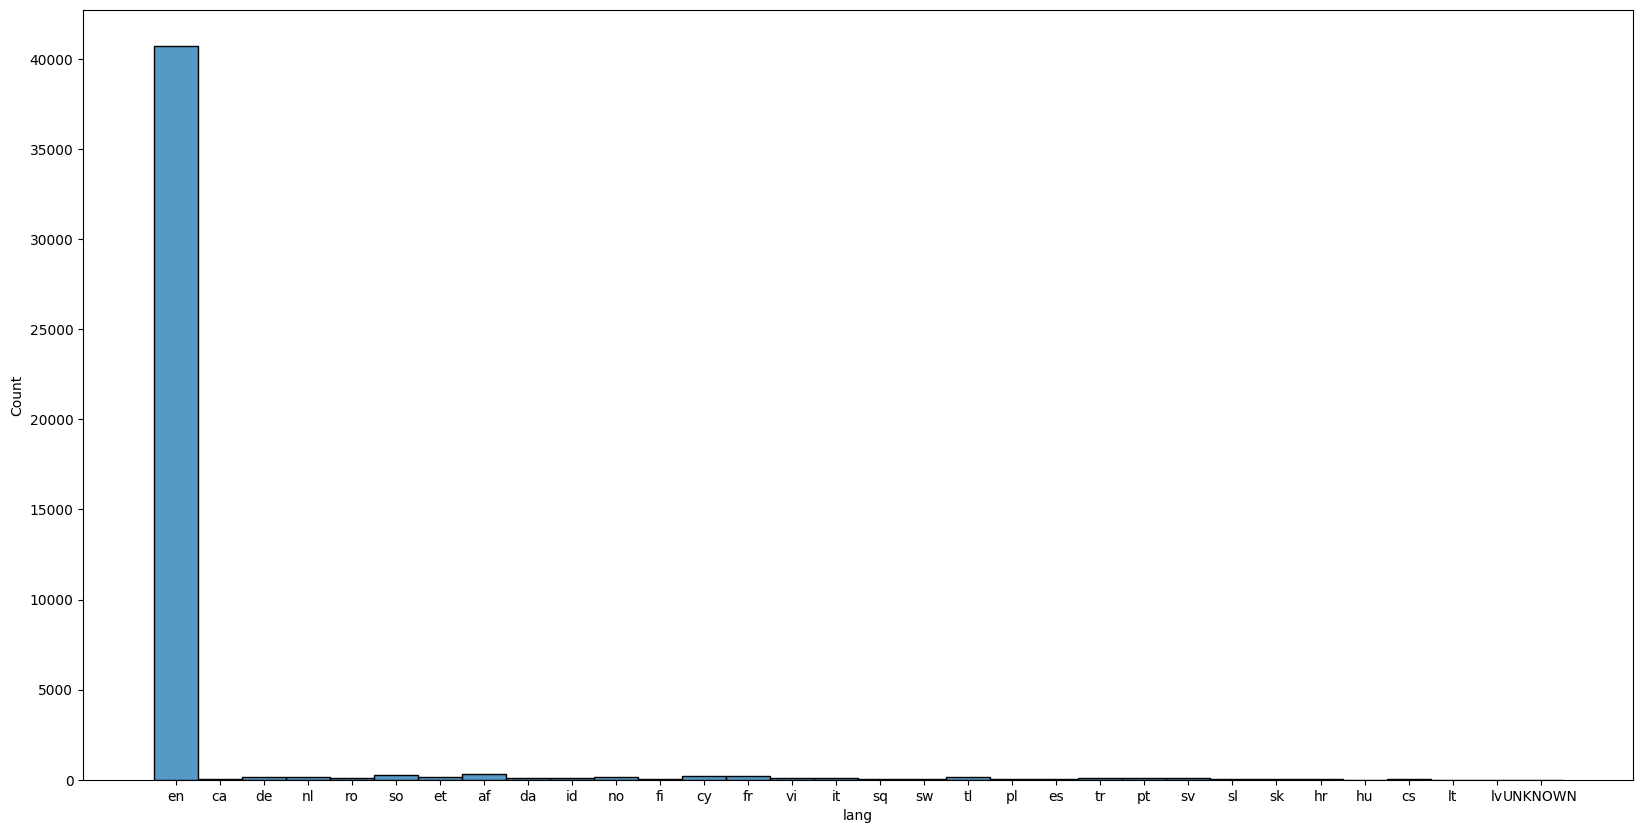

In [139]:
plt.figure(figsize=(20, 10))
sns.histplot(train_df['lang'])

In [146]:
# Function to detect if text contains emojis
def contains_emoji(text):
    return bool(emoji.emoji_list(text))

# Apply the function to the DataFrame
train_df['contains_emoji'] = train_df['text'].apply(contains_emoji)

In [147]:
train_df['contains_emoji'].value_counts()

contains_emoji
False    42569
True       841
Name: count, dtype: int64

In [159]:
train_df[train_df['contains_emoji']==True]['text']

6        Yes I heard about the f bombs! That has to be ...
82                                       sorry [NAME]! 😘😘😘
108      omg [NAME] and his dad walking out together is...
150                                  Lmao Stole my joke! 😂
194      I always just say “thank you” because it is a ...
196      I had 3 last night 🙈 this rant was after glass #1
295       I am scared to even ask my mom ,I might get y...
384                                   That was brilliant 😂
388                      I am so excited for this game!! 😄
425      I appreciate this post, so it is appropriate i...
440      Are not people on the internet the best! I do ...
498      He sunk their house into the ground and blamed...
555      Or they saved their mom from a lifetime of fix...
604      Okay I can see this looking really cool for a ...
702                                          I love this 😂
785      Spending the day with family in beautiful Bowr...
816                                       😅 thanks bew b

In [160]:
def demojize_text(text):
    return emoji.demojize(text)

In [161]:
train_df['text']=train_df['text'].apply(demojize_text)

In [163]:
train_df['contains_emoji'] = train_df['text'].apply(contains_emoji)

In [164]:
train_df['contains_emoji'].value_counts()

contains_emoji
False    43410
Name: count, dtype: int64